# Modelling incoming radiation

## Components of global irradiance

In [1]:
%matplotlib
import pandas
import matplotlib.pyplot as plt
from alinea.astk.meteorology.sky_irradiance import sky_irradiances
from td_light import montpellier_spring_2013, montpellier_winter_2013, actual_irradiance
Montpellier ={
'longitude': 3.87,
'latitude': 43.61,
'altitude': 56,
'timezone': 'Europe/Paris'}
spring = montpellier_spring_2013()

Using matplotlib backend: Qt5Agg


### Estimation of irradiance sources on clear days
Global irradiance (global horizontal irradiance, ghi), component of incoming irradiance (direct normal irradiance, dni,   and diffuse horizontal irradiance, dhi) and solar position (azimuth, zenith) can be estimated for clear day anywhere on earth (here using P. Ineichen and R. Perez, "A New airmass independent formulation for the Linke turbidity coefficient", Solar Energy, vol 73, pp. 151-157, 2002):

In [2]:
sky_irradiances(daydate='2017-03-15', **Montpellier)

,azimuth,zenith,elevation,clearness,brightness,ghi,dni,dhi
2017-03-15 07:00:00+01:00,92.615513,89.716733,0.283267,1.000000,0.001063,0.043508,0.000000,0.043508
2017-03-15 08:00:00+01:00,103.117211,79.385683,10.614317,1.474582,0.294836,103.172356,138.807760,77.604389
2017-03-15 09:00:00+01:00,114.468339,69.141926,20.858074,2.513313,0.227361,286.086243,485.218263,113.322189
2017-03-15 10:00:00+01:00,127.505884,59.833764,30.166236,3.884570,0.155311,453.711226,686.266006,108.855324
2017-03-15 11:00:00+01:00,143.087672,52.176178,37.823822,4.425354,0.143602,582.990740,750.615706,122.686524
2017-03-15 12:00:00+01:00,161.653393,47.108420,42.891580,4.459195,0.148137,662.252435,766.726267,140.408412
2017-03-15 13:00:00+01:00,182.320671,45.570031,44.429969,4.452683,0.150096,685.163262,769.747387,146.311647
2017-03-15 14:00:00+01:00,202.704992,47.918315,42.081685,4.459870,0.147199,649.967659,764.824167,137.390607
2017-03-15 15:00:00+01:00,220.652836,53.620781,36.379219,4.395768,0.143020,559.409958,743.869112,118.201164
2017-03-15 16:00:00+01:00,235.636501,61.696087,28.303913,3.731082,0.159910,420.869280,664.497821,105.798739


* what is the diffuse (sky) / global (sun + sky) ratio for a clear day ?

### Comparison with measured horizontal irradiance 

* Pick-up some date using next cells and compare theoretic and actual irradiance for two contrasting  dates in spring or winter
* How good is the model for clear sky days ?
* For overcast (low light days) ?



In [4]:
spring.groupby(pandas.Grouper(freq='D')).agg('sum').loc[:,'ghi']

2013-05-21 00:00:00+02:00    6505.600000
2013-05-22 00:00:00+02:00    7577.748872
2013-05-23 00:00:00+02:00    5130.591243
2013-05-24 00:00:00+02:00    5523.983333
2013-05-25 00:00:00+02:00    5915.285608
2013-05-26 00:00:00+02:00    7945.932818
2013-05-27 00:00:00+02:00    6819.183333
2013-05-28 00:00:00+02:00    2270.515964
2013-05-29 00:00:00+02:00    6097.266667
2013-05-30 00:00:00+02:00    6539.733333
2013-05-31 00:00:00+02:00    4847.044996
2013-06-01 00:00:00+02:00    7976.483333
2013-06-02 00:00:00+02:00    7996.316667
2013-06-03 00:00:00+02:00    8013.163911
2013-06-04 00:00:00+02:00    7643.300000
2013-06-05 00:00:00+02:00    7507.494186
2013-06-06 00:00:00+02:00    7906.835432
2013-06-07 00:00:00+02:00    7473.433213
2013-06-08 00:00:00+02:00    1293.099425
2013-06-09 00:00:00+02:00    3352.816667
2013-06-10 00:00:00+02:00    6997.682055
2013-06-11 00:00:00+02:00    8124.089114
2013-06-12 00:00:00+02:00    7984.383333
2013-06-13 00:00:00+02:00    7705.870690
2013-06-14 00:00

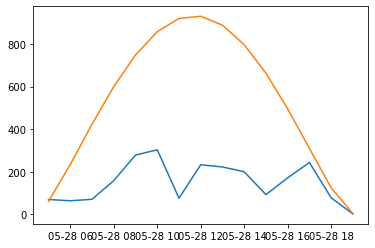

In [10]:
%matplotlib inline
ghi_t = sky_irradiances(daydate='2013-05-28',**Montpellier).ghi
ghi_obs = spring.loc[ghi_t.index,'ghi']
plt.plot(ghi_obs)
plt.plot(ghi_t)

### Estimation of irradiance sources on non clear days
On overcast day, dni and ghi can be estimated by models (here Perez, R., P. Ineichen, E. Maxwell, R. Seals and A. Zelenka, (1992).Dynamic Global-to-Direct Irradiance Conversion Models. ASHRAE Transactions-Research Series, pp. 354-369) by comparing expected and actual radiation

In [11]:
sky_irradiances(daydate='2013-05-28', ghi = ghi_obs, **Montpellier)

,azimuth,zenith,elevation,clearness,brightness,ghi,dni,dhi
2013-05-28 07:00:00+02:00,67.373910,82.386737,7.613263,1.426135,0.301614,69.300000,98.221226,56.287079
2013-05-28 08:00:00+02:00,76.997238,72.118176,17.881824,1.000000,0.152879,63.383333,0.000000,63.383333
2013-05-28 09:00:00+02:00,86.707123,61.397772,28.602228,1.000000,0.109577,70.415094,0.000000,70.415094
2013-05-28 10:00:00+02:00,97.335991,50.565164,39.434836,1.000000,0.185765,158.132075,0.000000,158.132075
2013-05-28 11:00:00+02:00,110.272719,40.030543,49.969457,1.029516,0.262878,277.833333,10.781785,269.577703
2013-05-28 12:00:00+02:00,128.145322,30.536515,59.463485,1.039782,0.252692,302.962963,13.419543,291.404636
2013-05-28 13:00:00+02:00,155.224659,23.724731,66.275269,1.000000,0.061693,75.611111,0.000000,75.611111
2013-05-28 14:00:00+02:00,191.173810,22.397590,67.602410,1.011623,0.185770,232.555556,2.838570,229.931121
2013-05-28 15:00:00+02:00,222.576566,27.387647,62.612353,1.004897,0.186021,222.203704,1.205971,221.132905
2013-05-28 16:00:00+02:00,243.540107,36.093449,53.906551,1.006545,0.183279,199.641509,1.635773,198.319711


* What is diffuse to global ratio in this case ?

## Directions of incidence

### Sun positions

The general idea is to attribute dni to sun position and spread dhi in the sky hemisphere.
For sun,  astronomical formulae (used by sky_irradiance) and simple models allow to predict intensity and direction of light incoming from the sun

##### Sky luminance
For sky, standard distribution have been proposed for clear_sky and fully overcast days.
For intermediate days, several interpolation strategy exist, the simpler one beeing to mix according to a linear ratio the two standard skies

Next cells allow to plot the overcast sky (soc: standard overcast sky) and clear sky luminance, and a mixed of the two depending on learness index of the day

In [16]:
from alinea.astk.sun_and_sky import cie_relative_luminance, sky_blend
from td_light import polar_grid, polar_plot
cie_relative_luminance?
sky_blend?

In [15]:
cie_relative_luminance?

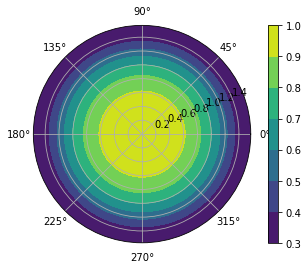

In [13]:
elev, azim, zenith = polar_grid()
luminance = cie_relative_luminance(elev, azim, type='soc')
polar_plot(zenith, azim, luminance)

* Plot and compare clear skies distributions and/or mixed ones

### Temporal integration and spatial discretisation

Depending on the model, different strategy could be used for temporal integration and spatial discretisation. Most common ones are
to use 46 direction for sky, irradiance distribution beeing averaged for a time step (typically a day) + optionally add one source per hour for sun.
Time step could be dwnscaled to hour (or less).
The next cells allows to compute such sources for different time steps and different strategy. (Spatial discretisation is fixed).

In [8]:
from alinea.astk.sun_and_sky import sky_sources, sun_sky_sources
sun_sky_sources?
sky_sources?

In [10]:
sun_sky_sources(ghi_obs, dates = ghi_obs.index)

((array([  7.28688656,  17.57855488,  28.33392306,  39.21389787,
          49.81618575,  59.41561634,  66.392851  ,  67.89550027,
          62.9680953 ,  54.24523228,  43.96618237,  33.15504616,
          22.31285067,  11.78210754,   2.02408033]),
  array([  67.11601909,   76.69719625,   86.33945709,   96.86633678,
          109.65012578,  127.30662911,  154.21648213,  190.43797067,
          222.29931747,  243.45156403,  257.95481049,  269.25914887,
          279.17222981,  288.70244141,  298.5207382 ]),
  array([  5.46865692e-01,   3.35160233e+00,   6.87949215e+00,
           1.03107607e+01,   1.32494423e+01,   1.54346583e+01,
           1.66912000e+01,   1.69225346e+01,   1.61113106e+01,
           1.43196344e+01,   1.16882224e+01,   8.43820284e+00,
           4.89311710e+00,   1.60956193e+00,   1.04199659e-02])),
 ([9.23,
   9.23,
   9.23,
   9.23,
   9.23,
   9.23,
   9.23,
   9.23,
   9.23,
   9.23,
   10.81,
   10.81,
   10.81,
   10.81,
   10.81,
   26.57,
   26.57,
   26.57,
 